#### Topics

* Probability Theory
* Bayesian vs Frequentist
* Random Variables
* Discrete vs Continous Variables
* PMF and PDF
* Expected Value
* Measures of Central Tendency: Varaince, STD
* Covariance and Correlation
* Conditional Probability
* Bayes Rule
* Central Limit Theorem
* Distributions: Gaussian, Exponential, Poisson, Bionomial
* Information Theory
* Entropy, KL divergence 

#### Probability

* Definition $ P(H) = \dfrac{\text{Number of Outcomes of the event}}{\text{Total events in the Sample Space}} $
* $ P(HH) = \dfrac{1}{4} $ Sample Space {HH,HT,TT,TH}
* Independent Observations: Probability can be multiplied
    * Drawing 3 heads in a row P(HHH) = $ \dfrac{1}{2*2*2} $ = $ \dfrac{1}{8} $
* Combinatorics:
    * Number of ways of choosing k items from n elements $ \binom{n}{k} $

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests

Consider a scenario where you have a fair coin and flip it 10 times. How would you calculate the probability of getting exactly 6 heads?

In [19]:
# python implementation
import math
def n_choose_k(n:int, k:int):
    return math.factorial(n) // (math.factorial(n-k) * math.factorial(k))
n_choose_k(10,6)

210

In [22]:
n_choose_k(10,6) /  2 ** 10

0.205078125

##### Expected Value

Expected value (or mean) of a random variable is a measure of the central tendency of its distribution. It provides a weighted average of all possible values that the random variable can take, with weights corresponding to their probabilities

* $ E(X) = \sum_{i} x_i \cdot P(x_i) $

In [25]:
values = [1,2,3]
probs = [0.1,0.4,0.5]
expected_value = sum([v * p for v, p in zip(values, probs)])
print(expected_value)

2.4


In [27]:
def create_coin_flip(n: int, p: float, size: int):
    return np.random.binomial(n,p,size)

In [37]:
# 5-coin flip, fair coin, 1000 runs
# random variable: number of heads in a 5-coin flip (iid)
experiment = create_coin_flip(5, 0.5, 1000)
# get outcomes for each head
heads, event_count = np.unique(experiment, return_counts=True)

In [43]:
event_proba = event_count / 1000

In [44]:
event_proba

array([0.037, 0.133, 0.326, 0.322, 0.148, 0.034])

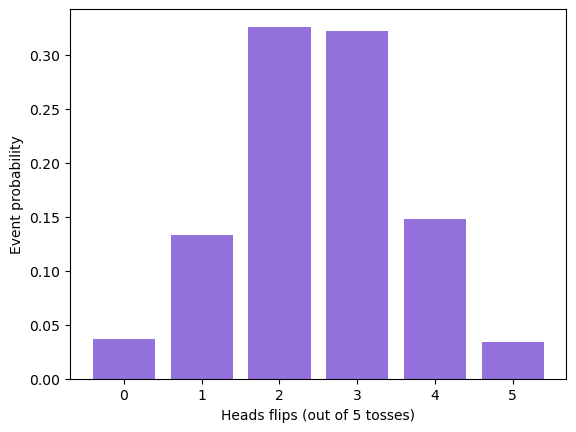

In [45]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

#### Mean, Median, Mode

In [52]:
np.sum(experiment) / 1000

2.513

In [53]:
experiment.sort()

In [55]:
(experiment[499] + experiment[500]) / 2

3.0

In [57]:
sp.stats.mode(experiment)

ModeResult(mode=2, count=326)

* The mean is heavily influenced by outliers or extreme values
* In skewed distributions (where the data is not symmetrically distributed), the mean may not be representative of the "typical" value.
* The median is not affected by outliers. For instance, if you have a dataset of salaries with one extremely high salary, the median will not change significantly, making it a robust measure of central tendency.
* A dataset can have multiple modes.
* Mean is preferred in normally distributed data and when performing further statistical analyses.
* Median is preferred for skewed distributions and when dealing with outliers.
* Mode is useful for categorical data and understanding the most common value.


#### Box and Whisker Plot

* A graphical representation of a dataset that displays its distribution, central tendency, and variability. It's particularly useful for visualizing the spread and symmetry of the data and for identifying outliers.
* Interquartile range (Q3-Q1):
    * Q1 (First Quartile): The median of the lower half of the dataset (excluding the median if the number of data points is odd).
    * Q3 (Third Quartile): The median of the upper half of the dataset (excluding the median if the number of data points is odd).
    * Whisker Low: Extends from Q1 to the minimum value within 1.5 times the IQR below Q1.
    * Whisker High: Extends from Q3 to the maximum value within 1.5 times the IQR above Q3.



In [58]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


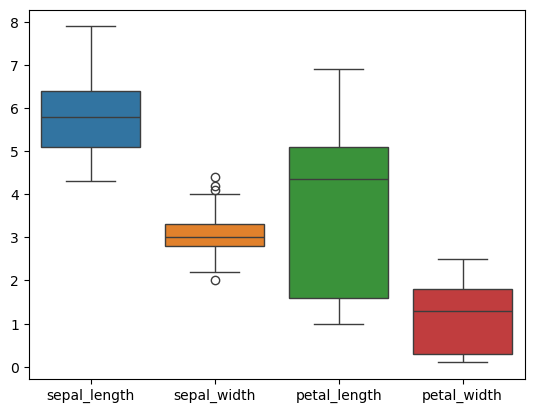

In [60]:
_ = sns.boxplot(data=iris)

#### Variance, Standard deviation 

Variance measures the average squared deviation of each data point from the mean.

Variance: $  \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2 $

Standard deviation: $  \sigma = \sqrt{\sigma^2}$

In [68]:
data = np.random.randint(5,size=100)

In [70]:
np.var(data)

2.1164

In [75]:
np.mean((data - np.mean(data))**2)

2.1164

In [76]:
np.sqrt(np.var(data))

1.4547852075134666

In [77]:
np.std(data)

1.4547852075134666

* Both variance and standard deviation are sensitive to outliers. Outliers can significantly increase the variance and standard deviation because they contribute large squared deviations from the mean. This sensitivity makes variance and standard deviation less robust in the presence of extreme values.
*  When calculating variance for a sample rather than an entire population, you need to use Bessel's correction. This involves dividing by n-1 instead of n.
*  If random variables are independent, the variance of their sum is the sum of their variances.
  $$ \text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y) $$
* Adding a constant to every point in data does not change variance, multiplying it by a constant scales it by constant ** 2.

In [85]:
add_constant = 5
mul_constant = 3

# Adding a constant
data_added = data + add_constant
variance_added = np.var(data_added)
np.var(data) == variance_added

True

In [86]:
# multiplying by a constant
data_added = data * mul_constant
variance_mul = np.var(data_added)

In [90]:
variance_mul == np.var(data) * (mul_constant ** 2)

True

* 68-95-99.7 Rule: In a normal distribution, about 68% of data falls within one standard deviation of the mean, 95% within two, and 99.7% within three.
* Standard deviation measures investment risk or volatility. A higher standard deviation indicates greater risk.

#### Correlation and Covariance

* Covariance denotes how two variables are related to each other
  $$ Cov(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$
* Positive Covariance implies as one variable increases the other also increases
* Correlation is a normalized covariance. Ranges between [-1, 1].
  $$ \rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
 $$


In [4]:
x = np.random.randint(5,size=10)
y = np.random.randint(5,size=10)

In [7]:
np.mean((x - np.mean(x)) * (y - np.mean(y)))

0.3

In [8]:
np.cov(x,y)

array([[2.66666667, 0.33333333],
       [0.33333333, 1.56666667]])

In [9]:
np.cov(x,y)[0,1]

0.3333333333333333

In [12]:
np.mean((x - np.mean(x)) * (y - np.mean(y))) / (np.std(x) * np.std(y))

0.16308201826336052

In [14]:
np.corrcoef(x, y)[0,1]

0.16308201826336055

Some points:

* Covariance is sensitive to the scale of the variables. However, correlation is scale-invariant since it's normalized by the standard deviations.
* Correlation Does Not Imply Causation
* Zero correlation does not necessarily mean the variables are independent, there could still be a non-linear relationship between them.
* Outliers can significantly impact both covariance and correlation.
* Pearson vs Spearman: Pearson measures linear relationship, Spearman measures monotonic realtionships.
* Highly correlated variables can impact the model performance, hence this becomes an important topic in machine learning and statistics.
* Covariance is symmetric

In [15]:
data = np.random.randn(5, 3)

In [17]:
cov_matrix = np.cov(data, rowvar=False)

In [19]:
is_symmetric = np.allclose(cov_matrix, cov_matrix.T)

In [20]:
is_symmetric

True

Connecting the dots:

* Correlation analysis can be used in feature selection
* PCA relies on covariance matrix to transform features in such a way that the variance is maximized.
* Regularization methods can be used to reduce the multicollinear features
* Cross-correlation features can be used in time series analysis.
* In neural networks, the covariance of the input is adjusted by techniques like Batch Normalization, Dropout to stabilze learning and reduce overfitting.

#### Distributions in Probability

##### Unifrom Distribution

1. Rolling a Fair Die
2. Random Number Generation
3. Shuffling a Deck of Cards
4. Choosing a Random Day of the Week
5. Random Selection of IP Addresses
6. Randomized Control Trials (RCTs) in Experiments
7. Load Balancing in Networks
8. Monte Carlo Simulations
9. Randomized A/B Testing
10. Random Employee Surveys

* Out of all distributions, uniform distribution has maximum entropy.
* Some of the ML models use uniform distribution to select initial point.


Uniform(low=a, high=b)

Mean

$ \mu = \frac{a + b}{2} $

Variance

$ \sigma^2 = \frac{(b - a)^2}{12} $

This shows that even though all values are equally likely, the central tendency and spread of the distribution can still be calculated and provide insights into the data.



In [100]:
data = np.random.uniform(low=0,high=1,size=10000)

<Axes: ylabel='Count'>

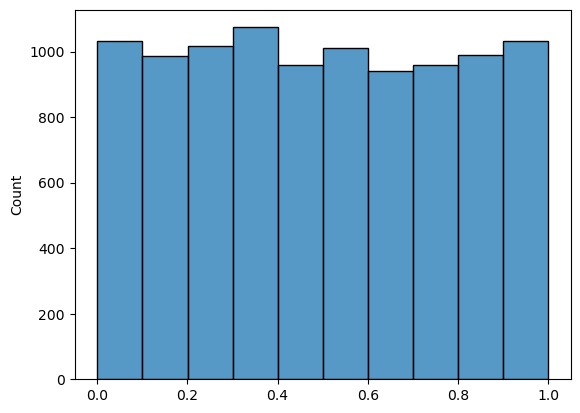

In [101]:
sns.histplot(data,bins=10)

##### Gaussian Distribution

* Continuous probability distribution characterized by its bell-shaped curve
* Symmetric around the mean
* Defined by mean and variance
* PDF
  $$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) $$
* Mean, Median and Mode are equal.

In [21]:
mu = 0 
sigma = 1

In [22]:
data = np.random.normal(mu, sigma, 1000)

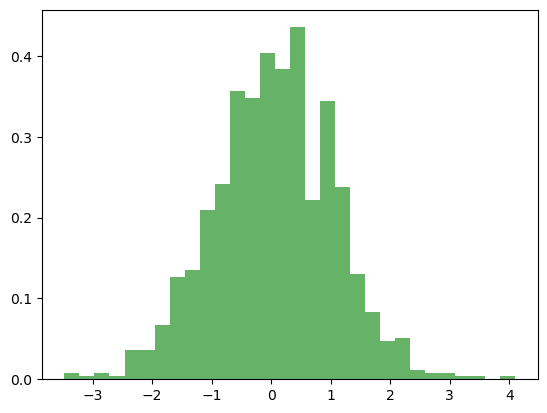

In [24]:
count, bins, ignored = plt.hist(data, 30, density=True, alpha=0.6, color='g')

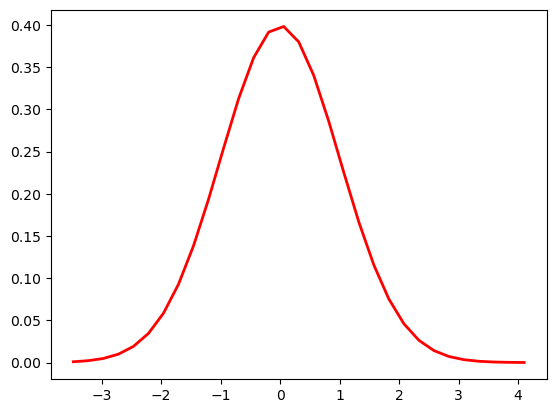

In [27]:
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

* Foundational in ML and statistics because of central limit theorem.
    * Regardless of the underlying distribution, samples drawn randomly from it will follow a normal distribution.
* Thanks to CLT, we can do A/B testing in different populations even though we don't have any idea on how the underlying distriubtions are distributed like.

In [28]:
# Set the number of experiments and sample size
n_experiments = 1000  # Number of experiments (trials)
sample_size = 30  # Sample size

In [34]:
uniform_data = np.random.uniform(0, 1, 10000)
# even though the underlying distribution is uniform, samples drawn from it will look like Gaussian

In [30]:
sample_means = []

# Perform experiments
for _ in range(n_experiments):
    # Take a random sample of 'sample_size' from the uniform data
    sample = np.random.choice(uniform_data, sample_size)
    
    # Calculate the mean of the sample
    sample_mean = np.mean(sample)
    
    # Store the sample mean
    sample_means.append(sample_mean)

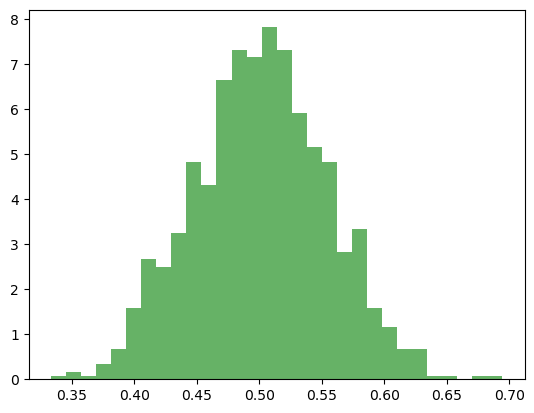

In [33]:
count, bins, ignored = plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g')

* Many ML models assume data follows a normal distribution. For example, linear regression assumes erros are normally distributed.
* In real world, sometimes it is incorrect to assume normal distribution. In those cases, we can apply some transformation or work with models which do not assume.
* Among all distributions with mean and variance, Gaussian has most entropy or least information. So we assume a Gaussian distribution when we don't have enough information about the underlying process.

##### Connecting the dots

* In Neural networks, the weights are initialized by using Gaussian (Xavier).
* Data Augmentation: Gaussian Noise is added to inputs to ensure more robust training.
* Variants of SGD rely on Gaussian noise to stabilize training and avoid getting struck in a local minima.

In [35]:
def xavier_init(shape):
    fan_in, fan_out = shape
    std_dev = np.sqrt(2 / (fan_in + fan_out))
    return np.random.normal(0, std_dev, size=shape)

In [38]:
weight_shape = (784, 256)  # Example for a layer with 784 inputs and 256 outputs
weights = xavier_init(weight_shape)
print(weights.shape)

(784, 256)


In [51]:
def add_gaussian_noise(image, mean=0, sigma=100):
    """
    Add Gaussian noise to an image.
    Args:
    - image (np.ndarray): Input image.
    - mean (float): Mean of the Gaussian noise.
    - sigma (float): Standard deviation of the Gaussian noise.
    
    Returns:
    - np.ndarray: Noisy image.
    """
    gaussian_noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + gaussian_noise, 0, 255)  # Assuming image pixel values are in [0, 255]
    return noisy_image

A little diversion:

The same concept of adding small amounts of noise and reconstructing it from noisy image is used in latest diffusion models. I will probably implement it at a later stage, but it is so interesting.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


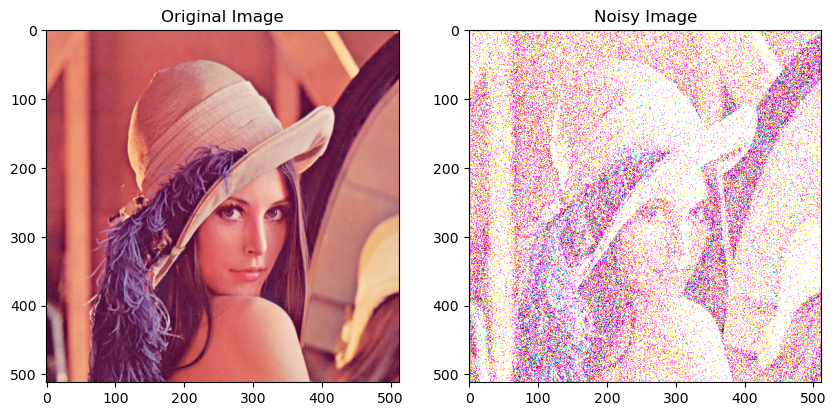

In [52]:
# Example usage

image = Image.open(requests.get("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png", stream=True).raw)
image = np.array(image)
# image = np.ones((100, 100)) * 128  # Create a dummy image with a constant value
noisy_image = add_gaussian_noise(image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.show()

###### Examples

1. Return on Investment on Stocks and Bonds: Can be assumed as Gaussian with mean and variance
2. Product Dimensions
3. Noise in Signals
4. Measurements like BMI, Blood Glucose etc.
5. Naive Bayes assumes data is Gaussian
6. Measurement Errors
7. Modelling customer behavior

##### Log-Normal Distribution

* Natural Logarithm of log-normal distribution is normally distributed.
* Skewed to the right, not symmetric
* Less sensitive to outliers
* Examples:
    * Income distributions: Sometimes, it helps to normalize log-normal distributions by applying a logarithm to improve model performance.
    * Modelling stock prices 

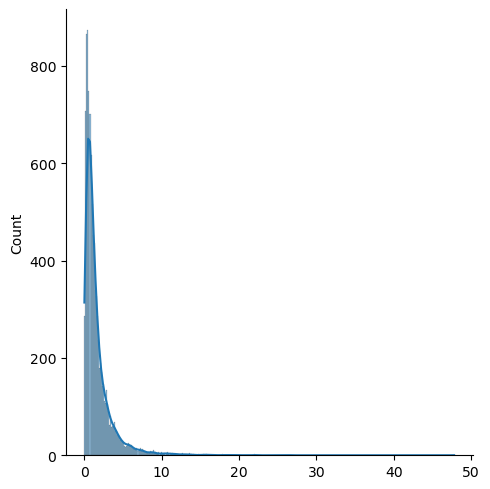

In [12]:
x = np.random.lognormal(size=10000) 
sns.displot(x,kde=True)

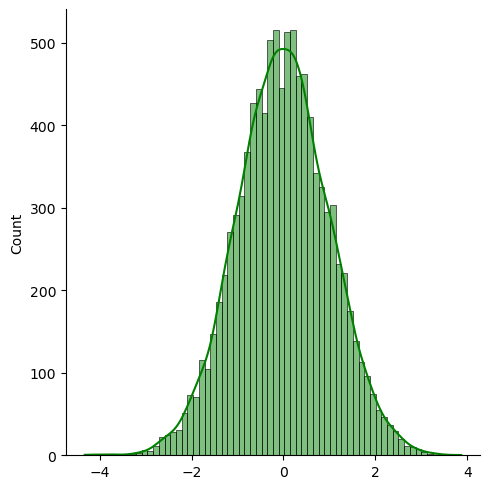

In [13]:
sns.displot(np.log(x), color='green', kde=True)

##### Exponential Distribution

* The Exponential Distribution is another important distribution and is typically used to model times between events or arrivals
$$ f(x; \lambda) = \lambda e^{-\lambda x} $$
$$ \mu = \frac{1}{\lambda} $$
$$ \sigma = \frac{1}{\lambda^2} $$
* Commonly used in Survival analysis

In [33]:
x = np.linspace(0, 20, 1000)

In [34]:
lambda_param = 5

In [35]:
pdf = sp.stats.expon.pdf(x, scale=1/lambda_param)

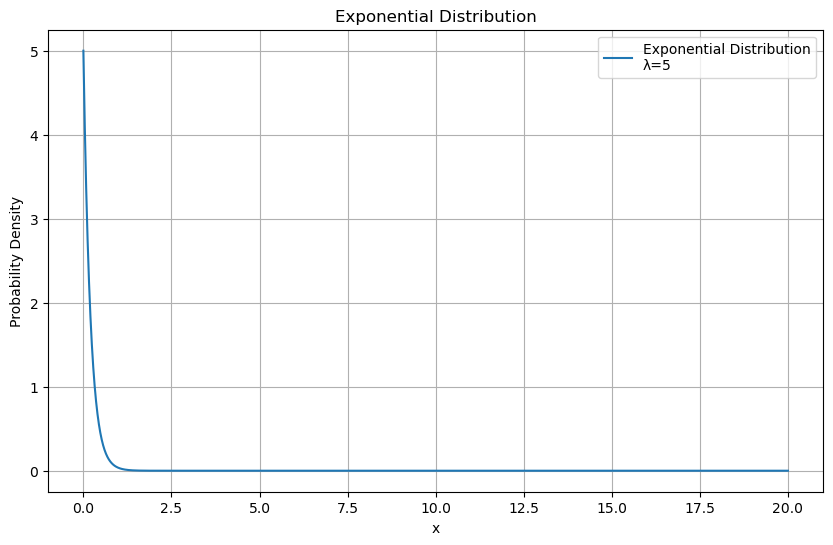

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Exponential Distribution\nλ={lambda_param}')
plt.title('Exponential Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

* Exponential distribution is memoryless. Events at time t are independent of events happened before it.
* In survival analysis, often used in medical and reliability studies, the exponential distribution models the time until an event (such as death, failure, or system breakdown)

##### Poisson Distribution

##### Bionomial Distribution

* Discrete Distribution
* Number of trails (n), probability of success in each trail(p)
  $$ P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k} $$

In [39]:
experiment = np.random.binomial(n=10, p=0.5,size=1000)

In [42]:
# n * p = Expected value
np.mean(experiment)

5.072

In [46]:
# n * p * (1-p) = Variance
np.var(experiment)

2.506816

In [47]:
10 * 0.5 * 0.5

2.5

(array([0.   , 0.004, 0.048, 0.108, 0.208, 0.236, 0.215, 0.118, 0.052,
        0.006, 0.005]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5]),
 <BarContainer object of 11 artists>)

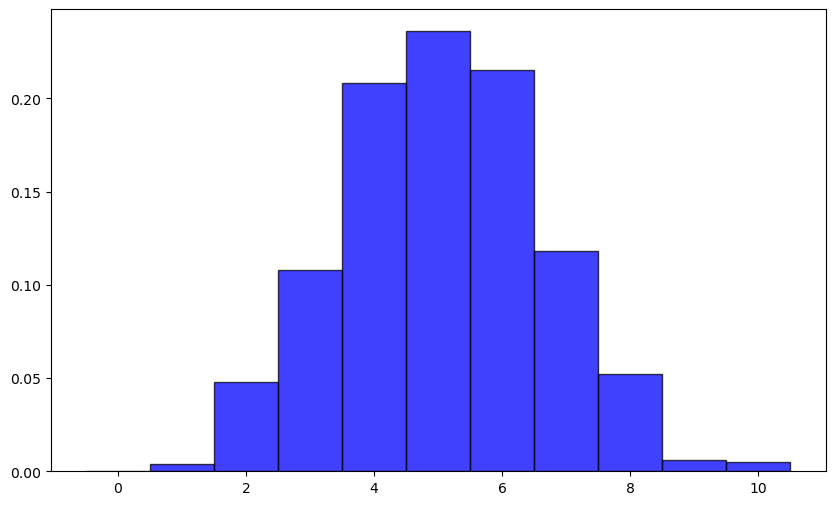

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(experiment, bins=np.arange(-0.5, 10+1.5, 1), 
         density=True, alpha=0.75, color='blue', edgecolor='black')

#### Conditional Probability

* Conditional probability is a fundamental concept in probability theory that deals with the probability of an event occurring given that some other event has occurred
$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$
$$ 
$$
$$ P(A\cup B\cup C) = P(A) + P(B) + P(C) - P(A \cap B) - P(A \cap C) - P(B \cap C) + P(A \cap B \cap C) $$
$$ P(A\cup B) = P(A) + P(B) - P(A \cap B) $$

* Reverse Computation:

$$ P(\text{Disease} \mid \text{Test Positive}) = \frac{P(\text{Test Positive} \mid \text{Disease}) \cdot P(\text{Disease})}{P(\text{Test Positive})} $$

$$ P(\text{Test Positive}) = P(\text{Test Positive} \mid \text{Disease}) \cdot P(\text{Disease}) + P(\text{Test Positive} \mid \text{No Disease}) \cdot P(\text{No Disease}) $$

#### Information Theory

* Entropy: Measure of uncertainity in a distribution
* Shannon's Entropy: Measures entropy of a discrete random variable
  $$ H(X) = - \sum_{x} p(x) \log_2 p(x) $$
* Conditional Entropy: Measure randomness of a variable given the values of another variable.
  $$ H(X|Y) = - \sum_{x,y} p(x,y) \log_2 p(x|y) $$
  $$ H(X|Y) = H(X,Y) - H(Y) $$
* Mutual Information: Measure of imformation of one variable contains about another variable
  $$ I(X;Y) = H(X) + H(Y) - H(X,Y) $$
* KL divergence is the measure of difference between two probability distributions.
  $$ D(P||Q) = \sum_{x} p(x) \log_2 \frac{p(x)}{q(x)} $$

In [54]:
def entropy(probs):
    return -np.sum(probs * np.log2(probs))

In [55]:
probs = [0.5,0.5]
entropy(probs)

1.0

In [56]:
probs = [0.3,0.7]
entropy(probs)

0.8812908992306927

In [57]:
probs = [0.01,0.99]
entropy(probs)

0.08079313589591118

In [58]:
def joint_entropy(probs):
    return -np.sum(probs * np.log2(probs))

In [61]:
joint_probs = [[0.25,0.25],[0.25,0.25]]
# Joint entropy of two fair coin flips

In [63]:
joint_entropy(joint_probs)

2.0

In [64]:
def conditional_entropy(probs, marginals):
    return joint_entropy(probs) - entropy(marginals)

In [65]:
marginal_probabilities_y = np.array([0.5, 0.5])

In [66]:
conditional_entropy(joint_probs, marginal_probabilities_y)

1.0

In [67]:
def mutual_information(entropy_x, entropy_y, entropy_xy):
    return entropy_x + entropy_y - entropy_xy

In [71]:
def kl_divergence(p,q):
    return np.sum(p * np.log2(p/q))

In [72]:
p = np.array([0.4, 0.6])
q = np.array([0.5, 0.5])

In [73]:
kl_divergence(p,q)

0.029049405545331364

* Entropy is used in building decision trees. Objective function minimizes entropy at each split.
* KL divergence is used in autoencoders.
* Mutual information can be used in feature selection.